# Training a Simple CNN

In [1]:
import numpy as np
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from data.image_dataset import ImageDataset
from training.cnn import ConvNet
from training.train import *
from training.eval import *
from data.convert_labels import *
import matplotlib.pyplot as plt

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
# Create ImageDataset
annotations_file_path = 'data/real/01_20_160_120/01_20_160_120.csv'
img_dir_path = 'data/real/01_20_160_120'

# Can override arguments specifying class boundaries
target_transform = lambda target: convert_labels(target)

train_data = ImageDataset(
  annotations_file=annotations_file_path,
  img_dir=img_dir_path,
  transform=None,
  target_transform=target_transform
)

In [3]:
# Create Dataloader
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)

train_features, train_labels = next(iter(train_loader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
print(np.unique(train_labels))

Feature batch shape: torch.Size([64, 1, 120, 160])
Labels batch shape: torch.Size([64])
[ 0  1  2  3  4  5  6  7  8  9 10 11 13 14 15]


In [4]:
model = ConvNet(input_dims=(160, 120))
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-5)

results = train(model, criterion, optimizer, train_loader, epochs=10)

| epoch  1 | train acc 0.099588 |
| epoch  2 | train acc 0.197115 |
| epoch  3 | train acc 0.252747 |
| epoch  4 | train acc 0.312500 |
| epoch  5 | train acc 0.396978 |
| epoch  6 | train acc 0.463599 |
| epoch  7 | train acc 0.566621 |
| epoch  8 | train acc 0.587225 |
| epoch  9 | train acc 0.692995 |
| epoch 10 | train acc 0.649725 |


[61.05903244018555, 50.41650390625, 53.739810943603516, 41.198158264160156, 37.13268280029297, 42.510475158691406, 41.034759521484375, 26.383747100830078, 31.76937484741211, 29.219608306884766, 32.62159729003906, 17.992483139038086, 17.275104522705078, 14.748786926269531, 12.043006896972656, 8.894227027893066, 10.888314247131348, 10.035530090332031, 7.300087928771973, 5.017370223999023, 7.734616279602051, 7.718218803405762, 8.151634216308594, 8.798417091369629, 5.849022388458252, 6.780911922454834, 6.4954328536987305, 8.130240440368652, 7.3942341804504395, 7.805792808532715, 5.269965648651123, 5.40830135345459, 5.436656951904297, 5.720964431762695, 5.460517883300781, 4.412232875823975, 5.523305416107178, 4.859405040740967, 3.5766894817352295, 3.4866104125976562, 5.106354713439941, 4.744961738586426, 3.8055949211120605, 3.5528500080108643, 3.286618232727051, 2.9395370483398438, 2.7345356941223145, 3.1218526363372803, 2.979480743408203, 3.1288955211639404, 3.2279133796691895, 3.011758327

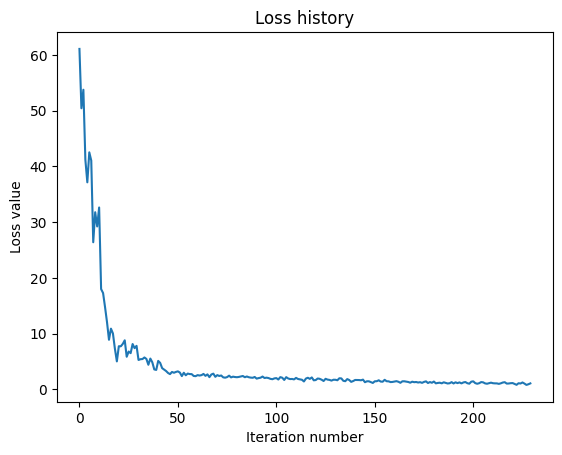

In [6]:
iter_train_loss_list, train_acc_list = results
plt.plot(iter_train_loss_list)
print(iter_train_loss_list)
plt.xlabel('Iteration number')
plt.ylabel('Loss value')
plt.title('Loss history')
plt.show()